<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import ssl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [96]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [95]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

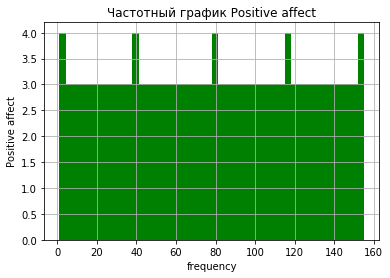

In [26]:
# равномерное распределение 

n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='green')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

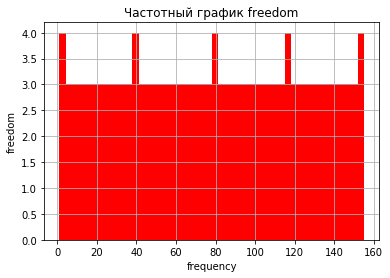

In [52]:
n, bins, patches = plt.hist(sorted(df['Freedom']) , 50, facecolor='red')

plt.xlabel('frequency')
plt.ylabel('freedom')
plt.title('Частотный график freedom')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [82]:
freedom = df[ df.Freedom.notnull() ]['Freedom']

print('Median: ', statistics.median(freedom))

print('Max: ', max(freedom))
      
print('Min: ', min(freedom))   

print('Expected value: ', statistics.mean(freedom))

print('Standard deviation: ', statistics.pstdev(freedom))

print('Variance: ', statistics.pvariance(freedom))

print('Range: ', max(freedom)-min(freedom))

Median:  78.0
Max:  155.0
Min:  1.0
Expected value:  78.0
Standard deviation:  44.74371464239419
Variance:  2002.0
Range:  154.0


In [65]:
# Выбросы 
print('Кол-во выбросов: ', freedom.isnull().sum())

df[ df['Freedom'].isnull() ].head()

Кол-во выбросов:  1


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Почему нельзя найти моду?

In [ ]:
# Моду нельзя найти так как все значения в выборке уникальные, следовательно встречаются одинаковое кол-во раз

# Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

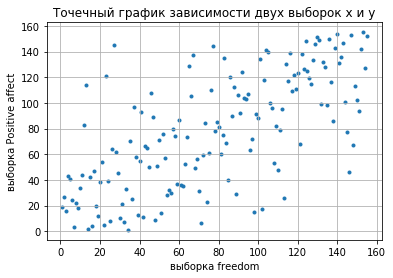

In [86]:
# корреляция графически
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [92]:
# коэффициент пирсона показывает насколько перемменные зависимы друг от друга, 0 - независимыб 1 - полностью зависимы
from scipy.stats import pearsonr

df_1 = df[ (df.Freedom.notnull()) & (df['Positive affect'].notnull()) ]

freedom = df_1['Freedom']
positive_affect = df_1['Positive affect']

corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициента корреляции r-Пирсона: ', corr)

коэффициента корреляции r-Пирсона:  0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [99]:
df_1 = df[ (df.Freedom.notnull()) ]
freedom = df_1['Freedom']
print(statistics.mean(freedom))

78.0


In [101]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [102]:
min(freedom_1)

-77.0

In [104]:
max(freedom_1)

77.0

In [106]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

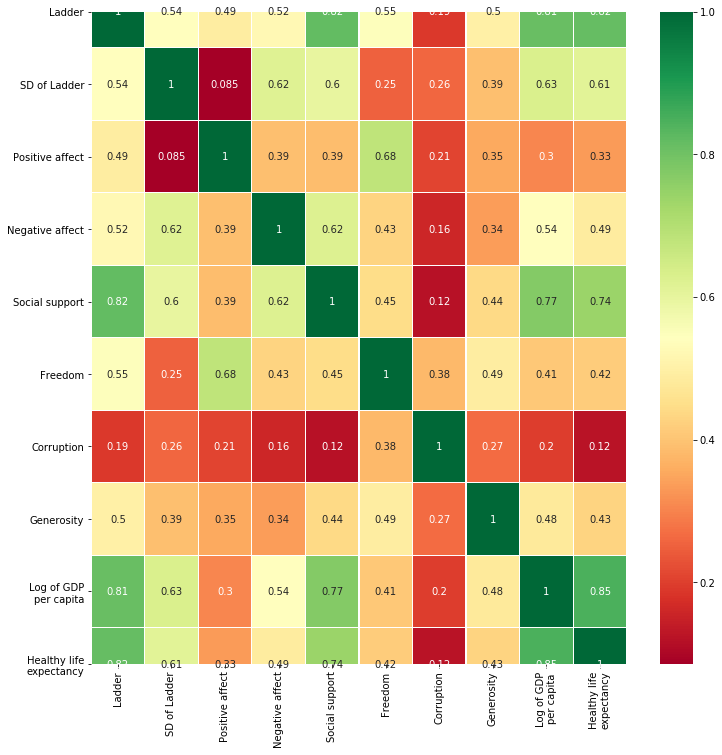

In [109]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [119]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_a=pd.read_csv(url)
df_a[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

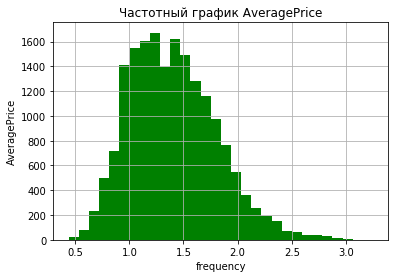

In [115]:
n, bins, patches = plt.hist( df_a['AveragePrice'], 30, facecolor='green' )

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

# частотный график схож с нормальным распределением с некоторымими отклонениями 
# также график схож с биномальным распредлением

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [121]:
df_a = df_a[ df_a['4046'].notnull() & df_a['4225'].notnull() & df_a['4770'].notnull() ]
df_a.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [124]:
column_4046 = df_a['4046']
column_4225 = df_a['4225']
column_4770 = df_a['4770']
avg_price = df_a['AveragePrice']

corr_4046, p_value = pearsonr(column_4046, avg_price)
print('Корелляция между колонкой 4046 и avg_price: ', corr_4046)

corr_4225, p_value = pearsonr(column_4225, avg_price)
print('Корелляция между колонкой 4225 и avg_price: ', corr_4225)

corr_4770, p_value = pearsonr(column_4770, avg_price)
print('Корелляция между колонкой 4770 и avg_price: ', corr_4770)

Корелляция между колонкой 4046 и avg_price:  -0.2083170484878848
Корелляция между колонкой 4225 и avg_price:  -0.1729277725093354
Корелляция между колонкой 4770 и avg_price:  -0.1794459839797562


In [ ]:
# Можно сделать вывод что между колонками 4046, 4225, 4770 и Average Price существует слабая обратная корелляция